# Exploratory Data Analysis
En este notebook exploramos los datos sobre noticias falsas que hemos descargado de Kaggle. Para ello, hacemos un estudio sobre la longitud de las noticias y sobre su sentimentalismo, asociando una etiqueta a cada noticia según contenga o no ciertas emociones. Las noticias se clasifican según sean falsas (```label = 1```) o verdaderas (```label = 0```).

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [86]:
df = pd.read_csv("Data/WELFake_Dataset.csv")

In [87]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [88]:
#Info de las columnas del dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


#### Valores nulos

In [89]:
# Visualización de valores nulos
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [90]:
# porcentaje de valores nulos
df.isna().sum()/len(df)

Unnamed: 0    0.000000
title         0.007736
text          0.000541
label         0.000000
dtype: float64

In [91]:
# Tenemos un porcentaje muy pequeño de nulos, así que es recomendable eliminarlos
df = df.dropna()

In [92]:
#Eliminamos la columna de los ids del dataframe
df = df.drop("Unnamed: 0", axis=1)

In [93]:
# distribución de la columna 'label'
df['label'].value_counts(normalize=True)

label
1    0.510351
0    0.489649
Name: proportion, dtype: float64

La columna ```label``` está balanceada, así que no vamos a necesitar emplear estrategias de under/oversampling.

## Creación de columnas para estudiar el sentimiento y la longitud de las noticias

Hacemos una lista de sentimientos negativos que pueda haber en las noticias para crear una columna que califique sentimiento positivo o negativo. Si alguna de las palabras de la lista está en la noticia, calificaremos sentimiento negativo (0), si no, positivo (1).

In [94]:
SENTIMENT_LIST = ['murder', 'cheat', 'fraud', 'scam', 'loss', 'steal', 'racist', 'hatred', 'sad', 'demise', 'succumbed', 
                  'lost', 'poll', 'rape', 'molest', 'theft', 'robbery', 'steal', 'stole']

In [95]:
# Función para columna sentiment
def sentiment(text):
    words = text.split()
    try:
        return int(any(word in SENTIMENT_LIST for word in words))
    except:
        return 0

In [96]:
df['length_text'] = df['text'].str.len()
df['length_title'] = df['title'].str.len()

In [97]:
# creamos una columna sentimiento
df['sentiment'] = df['text'].apply(sentiment)

In [98]:
df.head()

,title,text,label,length_text,length_title,sentiment
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137,0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95,0
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78,0


Podemos ver que la columna 'Label' está muy balanceada

## Análisis de la longitud del texto, `length_text`.

<Axes: xlabel='label', ylabel='length_text'>

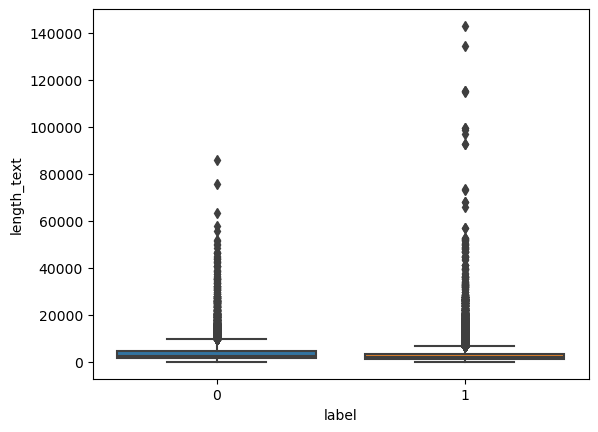

In [99]:
# Diagrama de caja para visualizar la distribución de la longitud de las noticias
sns.boxplot(df, x = 'label', y = 'length_text')

Observamos que la mayoría de noticias tienen longitudes bastante pequeñas, habiendo algunas excepciones. También notamos que hay varias columnas con longitud muy pequeña y que las noticias falsas tienen más outliers que las verdaderas.

In [100]:
mask = df['length_text'] < 2
df.loc[mask]

,title,text,label,length_text,length_title,sentiment
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,1,79,0
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1,1,68,0
325,Ohio State University Student Says Terrorist A...,,1,1,99,0
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1,1,114,0
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1,1,85,0
...,...,...,...,...,...,...
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1,1,73,0
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1,1,86,0
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1,1,78,0
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1,1,63,0


Como son espacios en blanco, los eliminamos:

In [101]:
df = df.loc[~mask]

Respecto de los outliers, podemos observar algunos para detectar anomalías:

In [102]:
df.loc[df['length_text'] > 60000]

,title,text,label,length_text,length_title,sentiment
327,Re: The Hard Working American vs. The Governme...,The Hard Working American vs. The Government P...,1,134206,57,1
6445,Заседание Международного дискуссионного клуба ...,Заседание Международного дискуссионного клуба ...,1,142961,73,0
8423,Re: More Americans Than Ever Are Losing Their ...,More Americans Than Ever Are Losing Their Reli...,1,65874,54,1
11596,Comment on BREAKING: Officer Charged for Killi...,Home / BREAKING NEWS / BREAKING: Officer Charg...,1,73679,110,1
14398,Benny Morris’s Untenable Denial of the Ethnic ...,References The Debate \nIt started when Daniel...,1,92561,68,1
17557,Re: How Many People Will Have To Migrate Out O...,How Many People Will Have To Migrate Out Of Ca...,1,115010,89,1
18477,The Great A.I. Awakening - The New York Times,"Late one Friday night in early November, Jun R...",0,85948,45,1
25077,President Putin Asks US To Stop Provoking Russia,Here is President Putin’s speech at Valdai Put...,1,68208,48,1
29372,Donald Trump’s New York Times Interview: Full ...,Following is a transcript of Donald J. Trump...,0,63384,77,1
30636,Re: It Is Now Mathematically Impossible To Pay...,It Is Now Mathematically Impossible To Pay Off...,1,99355,73,1


In [103]:
# calculamos el número de noticias falsas y verdaderas con longitud mayor que 60000
df.loc[df['length_text'] > 60000, 'label'].value_counts()

label
1    16
0     3
Name: count, dtype: int64

La mayoría de noticias con longitud elevada son falsas, así que no van a aportar mucho a nuestro modelo. Podríamos eliminarlas.

In [104]:
df = df.loc[df['length_text'] < 60000]

## Análisis de la longitud del título, `length_title`.

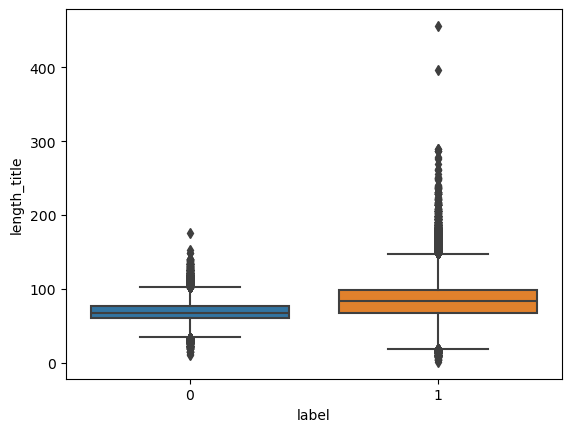

In [105]:
# Diagrama de caja para visualizar la distribución de la longitud de los títulos de las noticias
sns.boxplot(df, x = 'label', y = 'length_title')

Esto nos lleva a considerar la correlación entre las variables de longitud y de veracidad de la noticia. Las vemos en un dataframe:

In [72]:
df[['length_title', 'length_text', 'label']].corr()

,length_title,length_text,label
length_title,1.000000,-0.016479,0.325213
length_text,-0.016479,1.000000,-0.053967
label,0.325213,-0.053967,1.000000


Claramente, las noticias falsas tienen mayor longitud del título, como también indicaba la gráfica de cajas. Vamos a eliminar algunos outliers que no son significativos puesto que todas son falsas.

In [107]:
df.loc[df['length_title'] > 140, 'label'].value_counts()

label
1    1730
0       7
Name: count, dtype: int64

In [108]:
# eliminamos los outliers de longitud del titulo
df = df.loc[df['length_title'] < 140]

In [109]:
# examinamos ahora las que tienen un título corto
df.loc[df['length_title'] < 10, 'label'].value_counts()

label
1    26
Name: count, dtype: int64

Son todas falsas, aunque su texto puede ser largo y contener información relevante:

In [110]:
df.loc[df['length_title'] < 10, 'text'].str.len().mean()

3912.1153846153848

No las eliminamos porque pueden contener información relevante en la columna ```text```, que entendemos que va a ser nuestro principal objetivo.

## Análisis del sentimentalismo de las noticias:

In [111]:
# cantidad de noticias según 'sentiment'
df['sentiment'].value_counts(), df['sentiment'].value_counts(normalize = True)

(sentiment
 0    53815
 1    15147
 Name: count, dtype: int64,
 sentiment
 0    0.780357
 1    0.219643
 Name: proportion, dtype: float64)

In [ ]:
plt.title('Distribución de las Etiquetas (sentiment)')
plt.xlabel('Etiqueta')
plt.ylabel('Count')
plt.show()

C:\Users\alexb\AppData\Local\Temp\ipykernel_5604\2910295789.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Falsa' 'Falsa' 'Verdadera' ... 'Verdadera' 'Verdadera' 'Falsa']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  plot.loc[:, 'label'] = plot.loc[:, 'label'].replace({0: 'Verdadera', 1: 'Falsa'})


<Axes: xlabel='sentiment', ylabel='count'>

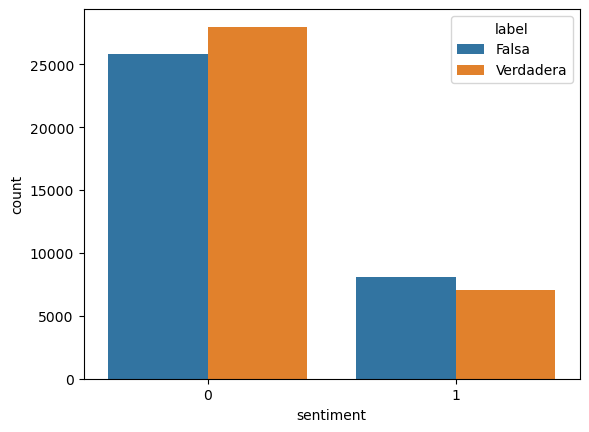

In [114]:
# Gráfico de barras para la distribución de etiquetas de la columna 'sentiment'
plot = df.copy()
plot.loc[:, 'label'] = plot.loc[:, 'label'].replace({0: 'Verdadera', 1: 'Falsa'})
sns.countplot(plot, x = 'sentiment', hue = 'label')

Observamos que, aunque la diferencia es pequeña, hay más noticias falsas que son sentimentalistas.

## Análisis de sentimientos con `textblob`
Extraemos la polaridad y la subjetividad de cada noticia y las guardamos en columnas

In [115]:
# Función para obtener el sentimiento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

In [116]:
df['polarity'], df['subjectivity'] = zip(*df['text'].apply(get_sentiment))

Ahora mostramos las estadísticas de cada columna y graficamos su distribución.

C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

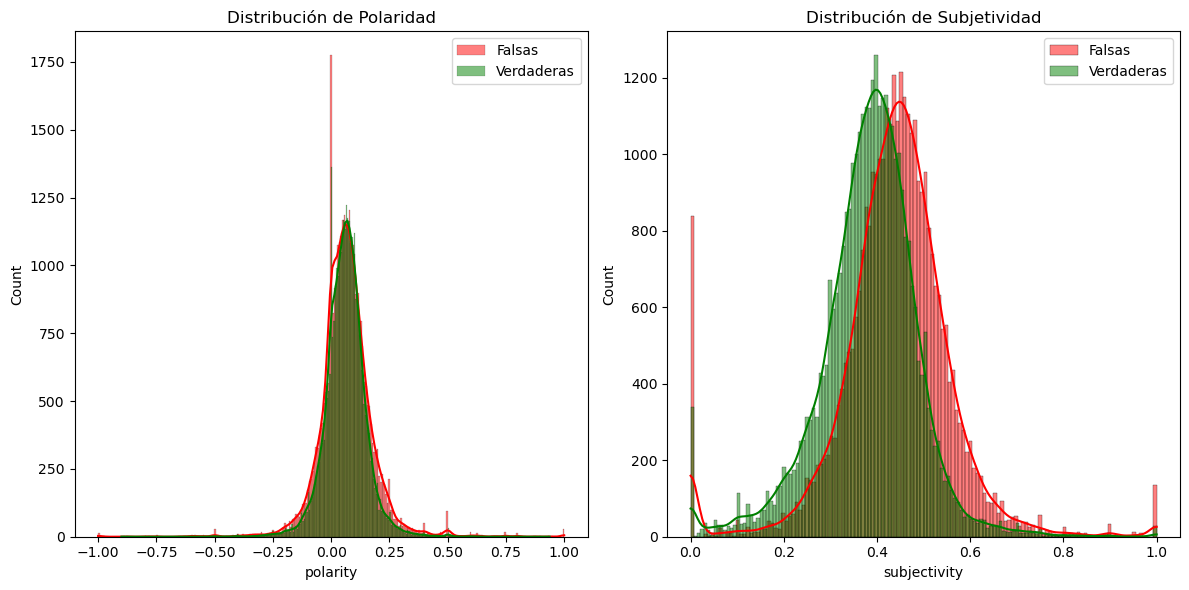

In [119]:
# Separar los datos en noticias falsas y verdaderas
fake_news = df[df['label'] == 1]
true_news = df[df['label'] == 0]

plt.figure(figsize=(12, 6))

# ploteamos las distribuciones de polaridad según sean falsas o verdaderas
plt.subplot(1, 2, 1)
sns.histplot(fake_news['polarity'], kde=True, color='red', label='Falsas')
sns.histplot(true_news['polarity'], kde=True, color='green', label='Verdaderas')
plt.title('Distribución de Polaridad')
plt.legend()

# ploteamos las distribuciones de subjetividad según sean falsas o verdaderas
plt.subplot(1, 2, 2)
sns.histplot(fake_news['subjectivity'], kde=True, color='red', label='Falsas')
sns.histplot(true_news['subjectivity'], kde=True, color='green', label='Verdaderas')
plt.title('Distribución de Subjetividad')
plt.legend()

plt.tight_layout()
plt.show()

La polaridad de ambas categorías de noticias se concentra alrededor de cero, lo cual es típico ya que la mayoría de los textos tienden a ser neutrales en tono.
Las curvas son bastante similares para ambas categorías, lo que indica que no hay una diferencia significativa en la polaridad entre las noticias falsas y verdaderas.
La subjetividad también muestra distribuciones similares para ambas categorías, con un ligero sesgo hacia textos más subjetivos en las noticias falsas. El pico de noticias falsas con subjetividad nula que observamos explica la mayor desviación estándar de dicha muestra.

### Ahora hacemos lo mismo con `title`:

In [120]:
df['title_polarity'], df['title_subjectivity'] = zip(*df['title'].apply(get_sentiment))

C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexb\anaconda3\envs\hackaboss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

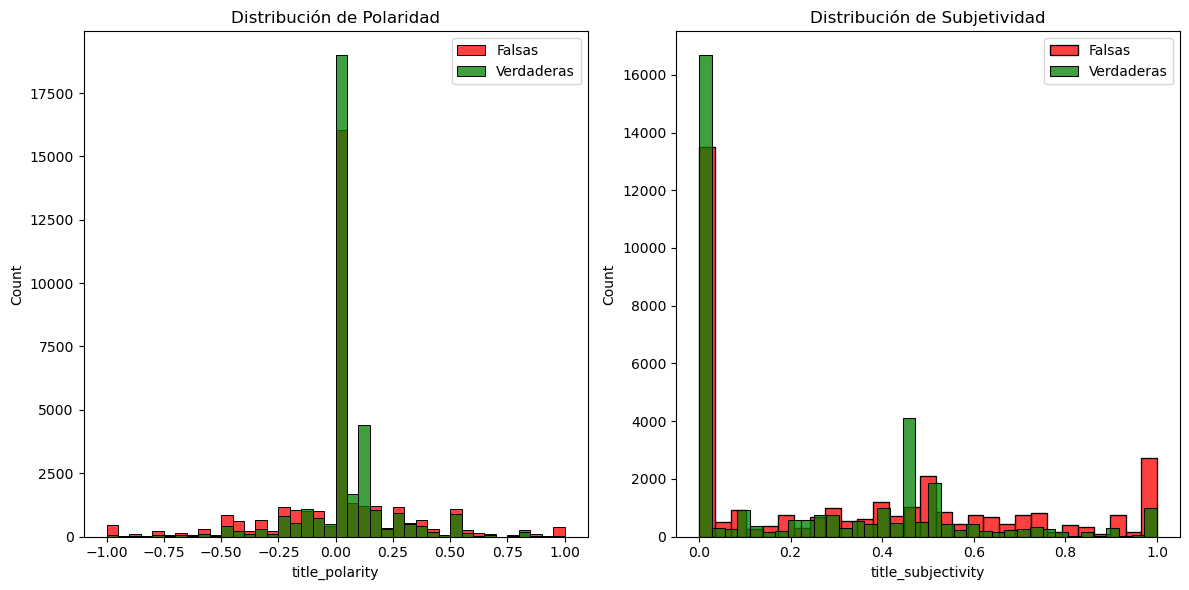

In [125]:
fake_news = df[df['label'] == 1]
true_news = df[df['label'] == 0]

plt.figure(figsize=(12, 6))

# ploteamos las distribuciones de polaridad según sean falsas o verdaderas
plt.subplot(1, 2, 1)
sns.histplot(fake_news['title_polarity'], color='red', label='Falsas', bins = 40)
sns.histplot(true_news['title_polarity'], color='green', label='Verdaderas', bins = 40)
plt.title('Distribución de Polaridad')
plt.legend()

# ploteamos las distribuciones de subjetividad según sean falsas o verdaderas
plt.subplot(1, 2, 2)
sns.histplot(fake_news['title_subjectivity'], color='red', label='Falsas')
sns.histplot(true_news['title_subjectivity'], color='green', label='Verdaderas')
plt.title('Distribución de Subjetividad')
plt.legend()

plt.tight_layout()
plt.show()

Los resultados en `polarity` son parecidos a los que obtuvimos con `text`. Las noticias tienden a no tener polaridad, aunque en los extremos podemos ver que las falsas alcanzan mayores valores de polaridad. Sin enmbargo, no observamos una gran diferencia entre la subjetividad de falsas y verdaderas.

In [126]:
# matriz de correlación
df.corr(numeric_only=True)

,label,length_text,length_title,sentiment,polarity,subjectivity,title_polarity,title_subjectivity
label,1.000000,-0.055136,0.293512,0.046505,0.018448,0.231192,-0.060813,0.144913
length_text,-0.055136,1.000000,-0.024405,0.285332,0.027703,0.067897,0.027918,0.053533
length_title,0.293512,-0.024405,1.000000,0.039231,-0.021426,0.129153,-0.018436,0.237852
sentiment,0.046505,0.285332,0.039231,1.000000,-0.022366,0.092072,-0.010873,0.053299
polarity,0.018448,0.027703,-0.021426,-0.022366,1.000000,0.190630,0.213637,0.033618
subjectivity,0.231192,0.067897,0.129153,0.092072,0.190630,1.000000,0.011310,0.219758
title_polarity,-0.060813,0.027918,-0.018436,-0.010873,0.213637,0.011310,1.000000,0.021138
title_subjectivity,0.144913,0.053533,0.237852,0.053299,0.033618,0.219758,0.021138,1.000000


<Axes: >

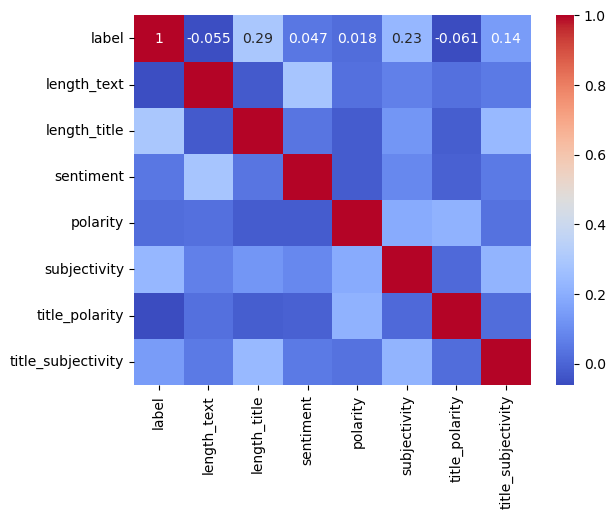

In [132]:
# Crear heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

La conclusión es que las únicas correlaciones observables para la columna `label` se dan con la longitud del título y ligeramente con la subjetividad. Como habíamos visto antes, la polaridad y el sentimiento no tienen gran relación con la veracidad de la noticia.

In [133]:
# guardamos los datos procesados en un nuevo csv
df.to_csv('Data/fake_news_after_eda.csv', header=True, index=False)